# Import the data

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

---

# Data exploration

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Analysis of the tweets' bodies

### Distribution of real and fake tweets in the data

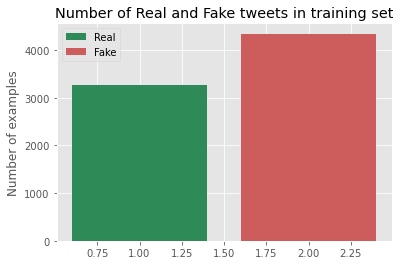

In [5]:
train_data['target'].value_counts()
len_real = len(train_data[train_data['target']==1])
len_fake = len(train_data[train_data['target']==0])

plt.style.use('ggplot')

plt.figure(figsize=(6,4))
plt.bar(x=1, height=len_real, label='Real', color='seagreen')
plt.bar(x=2, height=len_fake, label='Fake', color='indianred')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Number of Real and Fake tweets in training set')
plt.show()

### Length of a tweet

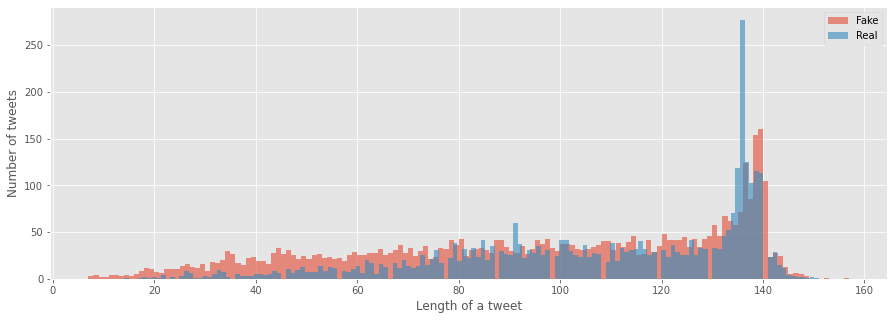

In [6]:
train_data['length'] = train_data['text'].apply(len)

plt.figure(figsize=(15,5))
plt.hist(x=train_data[train_data['target']==0]['length'], bins=150, alpha=0.6, label='Fake')
plt.hist(x=train_data[train_data['target']==1]['length'], bins=150, alpha=0.6, label='Real')
plt.legend()
plt.xlabel('Length of a tweet')
plt.ylabel('Number of tweets')
plt.show()

### Number of words in tweet

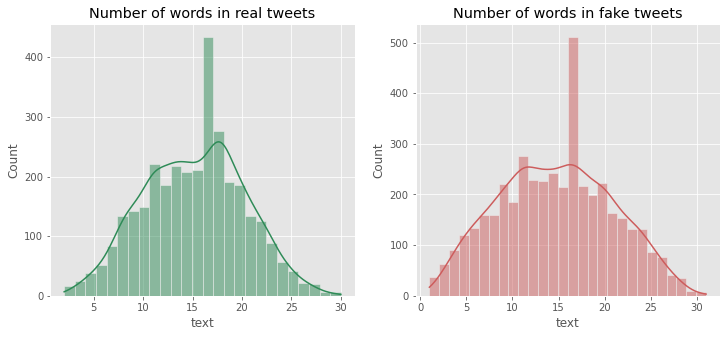

In [7]:
real_words = train_data[train_data['target']==1]['text'].str.split().apply(len)
fake_words = train_data[train_data['target']==0]['text'].str.split().apply(len)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.histplot(real_words, ax=ax1, color='seagreen', kde=True)
ax1.set_title('Number of words in real tweets')
sns.histplot(fake_words, ax=ax2, color='indianred', kde=True)
ax2.set_title('Number of words in fake tweets')
plt.show()

### Most common word lengths

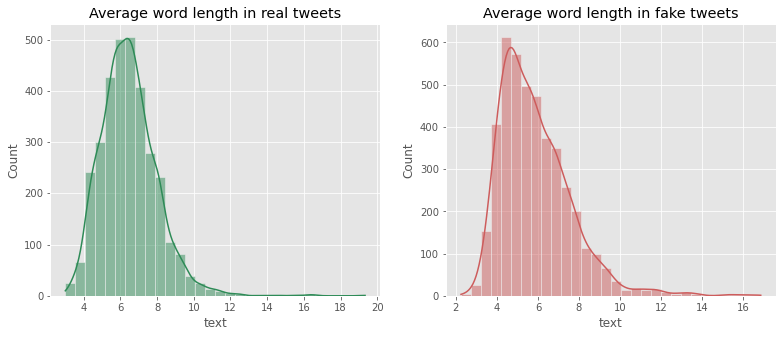

In [8]:
wordlength_real     = train_data[train_data['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
avg_wordlength_real = wordlength_real.apply(sum)/wordlength_real.apply(len)
wordlength_fake     = train_data[train_data['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
avg_wordlength_fake = wordlength_fake.apply(sum)/wordlength_fake.apply(len)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
sns.histplot(avg_wordlength_real, ax=ax1, bins=30, color='seagreen', kde=True)
ax1.set_title('Average word length in real tweets')
sns.histplot(avg_wordlength_fake, ax=ax2, bins=30, color='indianred', kde=True)
ax2.set_title('Average word length in fake tweets')
plt.show()

### Most common words

In [9]:
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jedrzejalchimowicz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#Define stopwords
stop_words = set(stopwords.words('english'))

#Creates a list of all words in passed data
def create_corpus(data, target):
    corpus = []
    for tweet in data[data['target']==target]['text'].str.split():
        for word in tweet:
            corpus.append(word)
    return corpus

In [11]:
#Plots most common words in passed data
def analyse_words(data):
    
    #Create lists of all words and initialize dictionaries
    real_tweets      = create_corpus(data, 1)
    fake_tweets      = create_corpus(data, 0)
    real_word_count  = defaultdict(int)
    fake_word_count  = defaultdict(int)
    
    #Remove punctuation
    real_tweets = [x.translate(str.maketrans('', '', string.punctuation)) for x in real_tweets]
    fake_tweets = [x.translate(str.maketrans('', '', string.punctuation)) for x in fake_tweets]
    
    #Lowercase all words
    real_tweets = [x.lower() for x in real_tweets]
    fake_tweets = [x.lower() for x in fake_tweets]
    
    #Count the freaquency of each word
    for word in real_tweets:
        if word not in stop_words:
            real_word_count[word] += 1
    for word in fake_tweets:
        if word not in stop_words:
            fake_word_count[word] += 1
    
    #Sort the list of words by most freaquently used (first is '', thus starting from index 1)
    real_word_count_sorted  = sorted(real_word_count.items(), key=lambda item: item[1], reverse=True)[1:12]
    fake_word_count_sorted  = sorted(fake_word_count.items(), key=lambda item: item[1], reverse=True)[1:12]
    
    #Draw figures
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))
    x, y = zip(*real_word_count_sorted)
    ax1.bar(x=x, height=y, color='seagreen')
    ax1.set_title('Real tweets')
    x, y = zip(*fake_word_count_sorted)
    ax2.bar(x=x, height=y, color='indianred')
    ax2.set_title('Fake tweets')
    plt.suptitle('Most used meaningful words', fontsize=15)

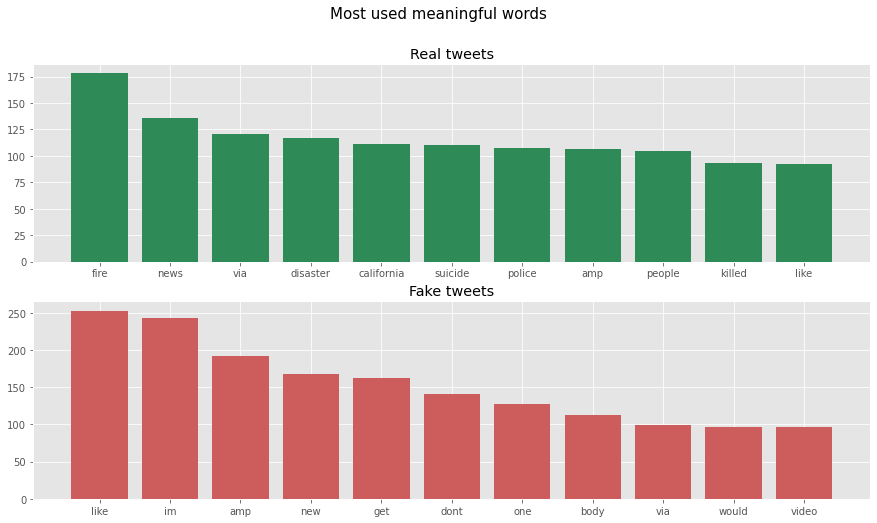

In [12]:
analyse_words(train_data)

### Most common punctuation

In [13]:
#Define punctuation characters
punct = string.punctuation

#Plots most common punctuation in passed data
def analyse_punctuation(data):
    
    #Create list of all words and punctuation and initialize dictionaries
    real_tweets       = create_corpus(data, 1)
    fake_tweets       = create_corpus(data, 0)
    real_punct_count  = defaultdict(int)
    fake_punct_count  = defaultdict(int)
    
    #Count the freaquency of each symbol
    for word in real_tweets:
        if word in punct:
            real_punct_count[word] += 1
    for word in fake_tweets:
        if word in punct:
            fake_punct_count[word] += 1
    
    #Sort the list of symbols by most freaquently used
    real_punct_count_sorted  = sorted(real_punct_count.items(), key=lambda item: item[1], reverse=True)[:12]
    fake_punct_count_sorted  = sorted(fake_punct_count.items(), key=lambda item: item[1], reverse=True)[:12]
    
    #Plot figures
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))
    x, y = zip(*real_punct_count_sorted)
    ax1.bar(x=x, height=y, color='seagreen')
    ax1.set_title('Real tweets')
    x, y = zip(*fake_punct_count_sorted)
    ax2.bar(x=x, height=y, color='indianred')
    ax2.set_title('Fake tweets')
    plt.suptitle('Most used symbols', fontsize=15)

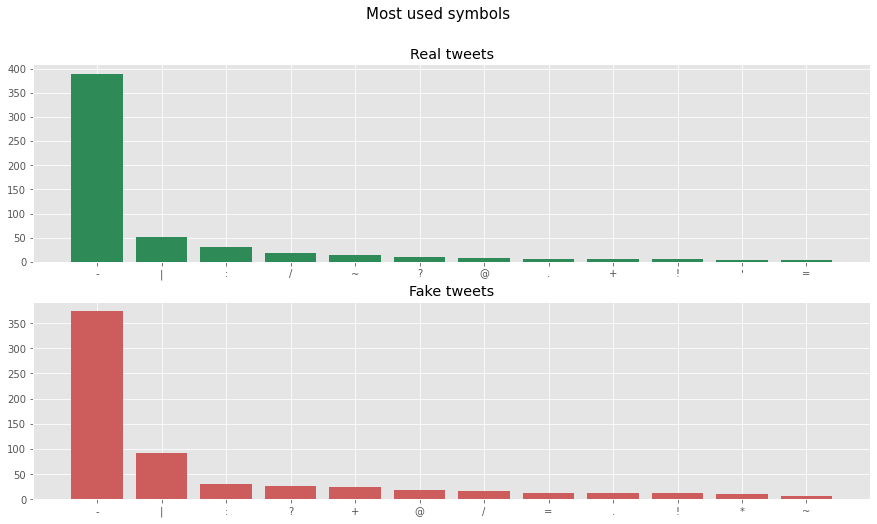

In [14]:
analyse_punctuation(train_data)

## Analysis of location data

In [15]:
train_data['location'].isnull().sum()

2533

Comment: Too much data to simply remove the lines with missing values

In [16]:
top_loc_real = train_data[train_data['target']==1]['location'].value_counts()[:12]
top_loc_fake = train_data[train_data['target']==0]['location'].value_counts()[:12]

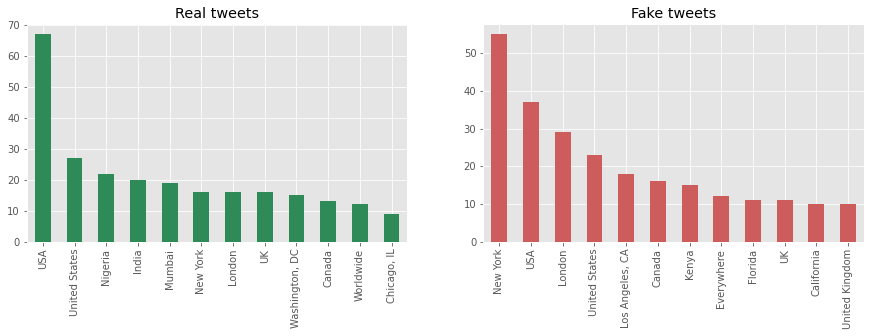

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
top_loc_real.plot(kind='bar', ax=ax1, color='seagreen')
ax1.set_title('Real tweets')
top_loc_fake.plot(kind='bar', ax=ax2, color='indianred')
ax2.set_title('Fake tweets')
plt.show()

## Analysis of keyword data

In [18]:
train_data['keyword'].isnull().sum()

61

Comment: Very few missing data in this category, we can remove those rows and proceede as usual without loosing too much information

In [19]:
#Remove rows with missing data
print('Before removing rows: ', len(train_data))
train_data = train_data.dropna(subset=['keyword'])
print('After removing rows: ', len(train_data))

Before removing rows:  7613
After removing rows:  7552


#### Check how many unique keywords

In [20]:
len(train_data['keyword'].unique())

221

#### Most common keywords

In [276]:
keyw_real = train_data[train_data['target']==1]['keyword'].value_counts()[:10]
keyw_fake = train_data[train_data['target']==0]['keyword'].value_counts()[:10]

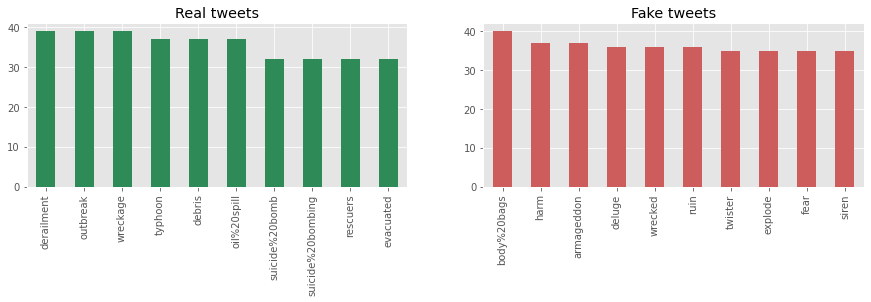

In [277]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,3))
keyw_real.plot(kind='bar', ax=ax1, color='seagreen')
ax1.set_title('Real tweets')
keyw_fake.plot(kind='bar', ax=ax2, color='indianred')
ax2.set_title('Fake tweets')
plt.show()

#### Distribution seems very even, lets see the entire data

In [278]:
keyw_real = train_data[train_data['target']==1]['keyword'].value_counts()
keyw_fake = train_data[train_data['target']==0]['keyword'].value_counts()

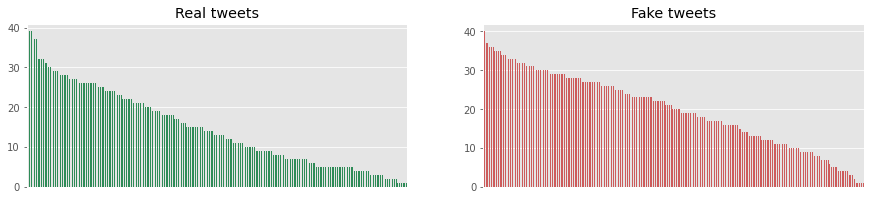

In [279]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,3))
keyw_real.plot(kind='bar', ax=ax1, color='seagreen')
ax1.set_title('Real tweets')
ax1.axes.xaxis.set_visible(False)
keyw_fake.plot(kind='bar', ax=ax2, color='indianred')
ax2.set_title('Fake tweets')
ax2.axes.xaxis.set_visible(False)
plt.show()

---

### *Conclusions:* 
1. Tweet body data
    1. The structure of the tweet (length, average word length, punctuation) is very simmilar betweet real and fake tweets, thus, none of those will be used as an attribute for our model.
    2. Most common words differ a lot between real and fake tweets. Bag of words implementation can bring promising results.
3. Location data
    1. Too much empty data to work with - workarounds decreased the accuracy of the model - not implemented in this project
4. Keyword data
    1. Only 61 rows with missing values - can be removed without loosing too much information
    2. Keywords very evenly distributed across data - hard to see clear trends and outliers

---

# Cleaning the data

In [21]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jedrzejalchimowicz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Remove urls, html, emojis and punctutation

In [22]:
def remove_url(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    return text

def remove_html(text):
    text = re.sub('<.*?>', '', text)
    return text

#Credits to:  https://github.com/slowkow
def remove_emoji(text):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punct(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

def remove_20(text):
    text = re.sub('%20', ' ', text)
    return text

In [23]:
#Clean the tweet body data
train_data['text'] = train_data['text'].apply(lambda x: remove_url(x))
train_data['text'] = train_data['text'].apply(lambda x: remove_html(x))
train_data['text'] = train_data['text'].apply(lambda x: remove_emoji(x))
train_data['text'] = train_data['text'].apply(lambda x: remove_punct(x))

In [24]:
#Clean the keyword data - spaces in html represented as '%20' need to replace those symbol with actual spaces
train_data['keyword'] = train_data['keyword'].apply(lambda x: remove_20(x))

---

# Bag of words implementation

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Using TfidfVectorizer did not yield better results. One possible explanation is that stop words have been removed and the vectoriser is reducing the importance of 'meaningful' words

### Lowercase, tokenize, stem, remove stopwords - all to improve the accuracy of our model

In [26]:
def lowercase(text):
    return text.lower()

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]
  
def stemming(data):
    porter = PorterStemmer()
    stem=[]
    data.rename(columns={'text':'text_pre_stemmed'}, inplace=True)
    data['text'] = data['text_pre_stemmed'].apply(lambda x: [porter.stem(word) for word in x])
    data.drop(columns = ['text_pre_stemmed'], inplace=True)

In [27]:
#Prepare the tweet body data for BoW
train_data['text'] = train_data['text'].apply(lambda x: lowercase(x))
train_data['text'] = train_data['text'].apply(lambda x: tokenize(x))
train_data['text'] = train_data['text'].apply(lambda x: remove_stopwords(x))
stemming(train_data)
train_data['text'] = train_data['text'].str.join(' ')

In [28]:
#Keyword data already ready for BoW implementation

### Divide data into test and cross-validation sets

In [269]:
from sklearn.model_selection import train_test_split

In [321]:
#Divide into train/test
train, cv = train_test_split(train_data, test_size = 0.3)

In [322]:
#Ensure more less even split
print('Number of true tweets in training set: ', len(train[train['target']==1]))
print('Number of false tweets in training set: ', len(train[train['target']==0]), end='\n\n')
print('Number of true tweets in cv set: ', len(cv[cv['target']==1]))
print('Number of false tweets in cv set: ', len(cv[cv['target']==0]))

Number of true tweets in training set:  2244
Number of false tweets in training set:  3042

Number of true tweets in cv set:  985
Number of false tweets in cv set:  1281


### Fit vectorizers

In [323]:
from scipy.sparse import hstack

In [349]:
vect1 = CountVectorizer()
vect2 = CountVectorizer()
temp1 = vect1.fit_transform(train['keyword'])
temp2 = vect2.fit_transform(train['text'])
train_vector = hstack([temp1,temp2])

temp1 = vect1.transform(cv['keyword'])
temp2 = vect2.transform(cv['text'])
cv_vector = hstack([temp1,temp2])

---

# Classification
Three algorithms will be used for comparison

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

### Logistic regression


In [353]:
clf_log = LogisticRegression(random_state=0)
clf_log.fit(train_vector, train['target'])

LogisticRegression(random_state=0)

### Svm

In [354]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_vector, train['target'])

SVC(kernel='linear')

### Decision tree

In [355]:
clf_dec = DecisionTreeClassifier(random_state=0)
clf_dec.fit(train_vector, train['target'])

DecisionTreeClassifier(random_state=0)

---

# Initial evaluation

In [356]:
from sklearn.metrics import f1_score
# from sklearn.model_selection import learning_curve

### Accuracy on training set

In [357]:
print('Logistic regression accuracy on training set: ', clf_log.score(train_vector, train['target']))
print('Svm accuracy on training set: ', clf_svm.score(train_vector, train['target']))
print('Decision tree accuracy on training set: ', clf_dec.score(train_vector, train['target']))

Logistic regression accuracy on training set:  0.9593265228906546
Svm accuracy on training set:  0.9841089670828603
Decision tree accuracy on training set:  0.9892167990919409


### Accuracy on cv set

In [358]:
print('Logistic regression accuracy on cv set: ', clf_log.score(cv_vector, cv['target']))
print('Svm accuracy on cv set: ', clf_svm.score(cv_vector, cv['target']))
print('Decision tree accuracy on cv set: ', clf_dec.score(cv_vector, cv['target']))

Logistic regression accuracy on cv set:  0.8014121800529568
Svm accuracy on cv set:  0.7824360105913504
Decision tree accuracy on cv set:  0.7537511032656664


### F1 score (on cv set)

In [359]:
print('Log f1 score: ', f1_score(cv['target'], clf_log.predict(cv_vector)))
print('Svm f1 score: ', f1_score(cv['target'], clf_svm.predict(cv_vector)))
print('Dec tree f1 score: ', f1_score(cv['target'], clf_dec.predict(cv_vector)))

Log f1 score:  0.7554347826086956
Svm f1 score:  0.7365045430251204
Dec tree f1 score:  0.7099792099792099


---

# Tuning the model

In [360]:
from sklearn.model_selection import GridSearchCV

### Gridsearch on Logistic regression

In [361]:
parameters = {'C':(0.01,0.03,0.1,0.3,1,10,100), 'solver':('liblinear', 'newton-cg')}
log = LogisticRegression()
clf = GridSearchCV(estimator=log, param_grid=parameters, cv=5)
clf.fit(train_vector, train['target'])
clf.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

### Gridsearch on Svm

In [170]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':(0.1 ,1, 10)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_vector, train['target'])
df = pd.DataFrame(clf.cv_results_)
df[['params', 'rank_test_score']].sort_values(['rank_test_score']).head(1)

,params,rank_test_score
4,"{'C': 1, 'kernel': 'rbf'}",1


### Gridsearch on Decision Tree

In [303]:
#Decision Tree
parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random')}
dec        = DecisionTreeClassifier()
clf        = GridSearchCV(estimator=dec, param_grid=parameters, cv=5)
clf.fit(train_vector, train['target'])
df = pd.DataFrame(clf.cv_results_)
df[['params', 'rank_test_score']].sort_values(['rank_test_score']).head(1)

,params,rank_test_score
1,"{'criterion': 'gini', 'splitter': 'random'}",1


## Apply new parameters

In [340]:
clf_log = LogisticRegression(solver='newton-cg', C=0.3)
clf_log.fit(train_vector, train['target'])

LogisticRegression(C=0.3, solver='newton-cg')

In [341]:
clf_svm = svm.SVC(kernel='linear', C=1, probability=True)
clf_svm.fit(train_vector, train['target'])

SVC(C=1, kernel='linear', probability=True)

In [342]:
clf_dec = DecisionTreeClassifier(criterion='gini', splitter='random')
clf_dec.fit(train_vector, train['target'])

DecisionTreeClassifier(splitter='random')

---

# Final evaluation

### New F1 scores

In [343]:
print('Log f1 score: ', f1_score(cv['target'], clf_log.predict(cv_vector)))
print('Svm f1 score: ', f1_score(cv['target'], clf_svm.predict(cv_vector)))
print('Dec tree f1 score: ', f1_score(cv['target'], clf_dec.predict(cv_vector)))

Log f1 score:  0.750551876379691
Svm f1 score:  0.7261078483715963
Dec tree f1 score:  0.6868792472556194


## ROC

In [258]:
from sklearn.metrics import roc_curve, roc_auc_score

### Calculate AUROC

In [344]:
#Probabilities of predictions, keep only the probability for positive outcome
random       = [0 for x in range(len(cv['target']))]
clf_log_prob = clf_log.predict_proba(cv_vector)[:,1]
clf_svm_prob = clf_svm.predict_proba(cv_vector)[:,1]
clf_dec_prob = clf_dec.predict_proba(cv_vector)[:,1]

#Calculate AUROC
r_auc   = roc_auc_score(cv['target'], random)
log_auc = round(roc_auc_score(cv['target'], clf_log_prob), 3)
svm_auc = round(roc_auc_score(cv['target'], clf_svm_prob), 3)
dec_auc = round(roc_auc_score(cv['target'], clf_dec_prob), 3)

print(f'Random chance: {r_auc}')
print(f'Log: {log_auc}')
print(f'SVM: {svm_auc}')
print(f'Dec: {dec_auc}') 

Random chance: 0.5
Log: 0.861
SVM: 0.836
Dec: 0.727


### Plot ROC curve

In [138]:
r_fpr, r_tpr, _     = roc_curve(cv['target'], random)
log_fpr, log_tpr, _ = roc_curve(cv['target'], clf_log_prob)
svm_fpr, svm_tpr, _ = roc_curve(cv['target'], clf_svm_prob)
dec_fpr, dec_tpr, _ = roc_curve(cv['target'], clf_dec_prob)

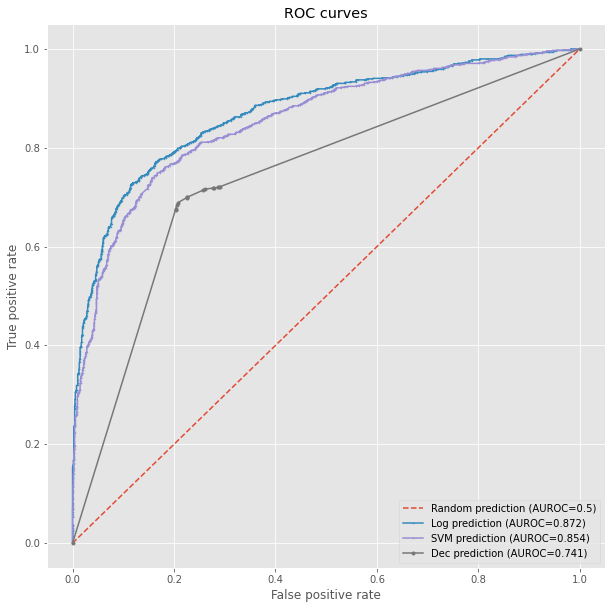

In [139]:
plt.figure(figsize=(10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label=f'Random prediction (AUROC={r_auc})')
plt.plot(log_fpr, log_tpr, marker='.', markersize=1, label=f'Log prediction (AUROC={log_auc})')
plt.plot(svm_fpr, svm_tpr, marker='.', markersize=1, label=f'SVM prediction (AUROC={svm_auc})')
plt.plot(dec_fpr, dec_tpr, marker='.', label=f'Dec prediction (AUROC={dec_auc})')
plt.title('ROC curves')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

*Comment:* The tradeoff between sensitivity and specificity pretty even - lack of clear improvement areas

---

# Output
Logistic Regression gave best results and will be used to make final predictions

In [345]:
#Prepare test data
test_data['text'] = test_data['text'].apply(lambda x: remove_url(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_html(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_emoji(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_punct(x))

test_data['keyword'] = test_data['keyword'].fillna('')
test_data['keyword'] = test_data['keyword'].apply(lambda x: remove_20(x))

test_data['text'] = test_data['text'].apply(lambda x: lowercase(x))
test_data['text'] = test_data['text'].apply(lambda x: tokenize(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_stopwords(x))
stemming(test_data)
test_data['text'] = test_data['text'].str.join(' ')

temp1 = vect1.transform(test_data['keyword'])
temp2 = vect2.transform(test_data['text'])
test_vector = hstack([temp1,temp2])

In [346]:
#Make predictions
predictions = clf_log.predict(test_vector)

In [347]:
#Cast to dataframe
output = pd.DataFrame(predictions, columns = ['target'])
output['id'] = test_data['id']
output = output[['id', 'target']]

In [348]:
#Save as a csv file
output.to_csv(r'./myPredictions.csv', index=False)

## Final score (by Kaggle): 79,28%